In [1]:
mydir = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_17_D52/"
mysuffix = "pool1_17_D52.scanpy.w_metadata.w_celltype.scanpy.obs_df.groupedby.donor_id-pool_id-time_point.celltype_fractions.tsv"

myfilename = paste0(mydir,mysuffix)
myfile = read.table(myfilename, header = T)
head(myfile,2)

donor_id,pool_id,time_point,celltype,f_cells
HPSI0114i-bezi_3,pool10,D52,Astro,0.01526718
HPSI0114i-bezi_3,pool10,D52,CHem,0.01526718


In [55]:
# library(dplyr)
# library(ggplot2)

In [9]:
df = myfile[myfile$celltype %in% c('DA','Sert'),] %>% group_by(donor_id, pool_id)  %>% summarise(diff.eff = sum(f_cells))
# hist(df$diff.eff)

In [10]:
head(df,2)

donor_id,pool_id,diff.eff
HPSI0114i-bezi_3,pool10,0.58269720
HPSI0114i-eipl_1,pool1,0.01287835


In [11]:
nrow(df)

[1] 230

In [12]:
df0 = df  %>% group_by(donor_id)  %>% summarise(diff.eff = mean(diff.eff))
# hist(df0$diff.eff)
head(df0,2)

donor_id,diff.eff
HPSI0114i-bezi_3,0.58269720
HPSI0114i-eipl_1,0.01287835


In [13]:
nrow(df0)

[1] 197

In [14]:
indir = '/nfs/leia/research/stegle/dseaton/hipsci/singlecell_endodiff/data/scanpy_data_v2/'
suffix = 'sce_merged_afterqc_filt_allexpts_exprs_20180618.day0.cluster2_fraction.tsv'
filename = paste0(indir,suffix)

In [15]:
# indir = '/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/ipsc_singlecell_analysis/sarkar2019_cuomo2020_merged/'
# suffix = 'sarkar2019_cuomo2020_merged.scanpy.dimreduction.obs_df.tsv'
# filename = paste0(indir,suffix)

In [16]:
file1 = read.csv(filename, sep = "\t")
head(file1)

donor_long_id,f_cells
HPSI0114i-bezi_1,0.00000000
HPSI0114i-eipl_1,0.81818182
HPSI0114i-iisa_1,0.02564103
HPSI0114i-iisa_3,0.05263158
HPSI0114i-joxm_1,0.06005222
HPSI0114i-kolf_2,0.68493151


In [17]:
nrow(file1)

[1] 112

In [18]:
# suffix = 'sarkar2019_cuomo2020_merged.scanpy.dimreduction.harmonyPCA.cell_clustering_df.tsv'
# filename = paste0(indir,suffix)

In [19]:
# file2 = read.csv(filename, sep = "\t")
# head(file2)

In [20]:
# nrow(file2)

In [21]:
# df1 = file1[file1$study == 'cuomo2020',] 
# nrow(df1)

In [22]:
# df2 = inner_join(df1, file2, by = 'index')
# nrow(df2)
# head(df2)

In [23]:
# df3 = df2 %>% group_by(donor_long_id, cuomo2020_experiment) %>% summarise(n = n())
# df4 = df2[df2$louvain == 2,] %>% group_by(donor_long_id, cuomo2020_experiment) %>% summarise(n = n())

In [24]:
# nrow(df3)
# nrow(df4)

In [25]:
# head(df3,2)
# head(df4,2)

In [26]:
# df5 = inner_join(df3,df4,by = c("donor_long_id", "cuomo2020_experiment"), suffix = c(".all",".cluster2"))
# nrow(df5)
# head(df5,2)

In [27]:
# df5$frac.cluster2 = df5$n.cluster2/df5$n.all
# nrow(df5)
# head(df5,2)

In [28]:
# df6 = df5  %>% group_by(donor_long_id)  %>% summarise(frac.cluster2 = mean(frac.cluster2))
# nrow(df6)
# head(df6,2)

In [29]:
head(df0)

donor_id,diff.eff
HPSI0114i-bezi_3,0.58269720
HPSI0114i-eipl_1,0.01287835
HPSI0114i-fikt_3,0.40282686
HPSI0114i-kolf_2,0.47059133
HPSI0114i-lexy_2,0.72690535
HPSI0114i-posc_1,0.81349206


In [30]:
df0$donor_long_id = df0$donor_id

In [31]:
df7 = inner_join(df0,file1,by = 'donor_long_id')
nrow(df7)
head(df7,2)

Warning message:
“Column `donor_long_id` joining factors with different levels, coercing to character vector”

[1] 45

donor_id,diff.eff,donor_long_id,f_cells
HPSI0114i-eipl_1,0.01287835,HPSI0114i-eipl_1,0.8181818
HPSI0114i-kolf_2,0.47059133,HPSI0114i-kolf_2,0.6849315


In [32]:
df7

donor_id,diff.eff,donor_long_id,f_cells
HPSI0114i-eipl_1,0.01287835,HPSI0114i-eipl_1,0.818181818
HPSI0114i-kolf_2,0.47059133,HPSI0114i-kolf_2,0.684931507
HPSI0114i-vass_1,0.85217391,HPSI0114i-vass_1,0.000000000
HPSI0114i-wegi_1,0.89759761,HPSI0114i-wegi_1,0.027777778
HPSI0214i-datg_2,0.44299163,HPSI0214i-datg_2,0.000000000
HPSI0214i-eiwy_1,0.60120482,HPSI0214i-eiwy_1,0.040000000
HPSI0214i-feec_2,0.04267186,HPSI0214i-feec_2,0.733333333
HPSI0214i-heth_1,0.03326828,HPSI0214i-heth_1,0.687500000
HPSI0214i-kucg_2,0.08373436,HPSI0214i-kucg_2,0.819444444
HPSI0214i-pelm_3,0.59398253,HPSI0214i-pelm_3,0.244485077


In [33]:
df7$frac.cluster2 = df7$f_cells
cor(df7$diff.eff, df7$frac.cluster2)
cor.test(df7$diff.eff, df7$frac.cluster2)$p.value

[1] -0.7551394

[1] 2.051661e-09

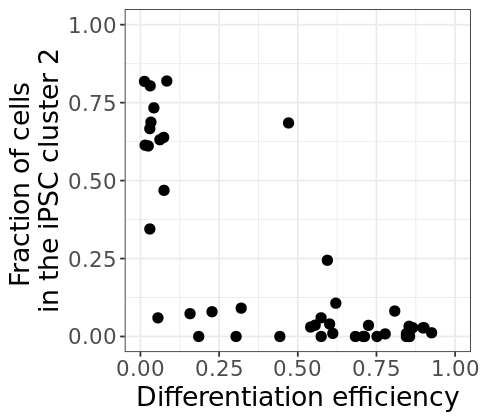

In [34]:
options(repr.plot.width=4, repr.plot.height=3.5)
ggplot(df7, aes(x = diff.eff, y = frac.cluster2)) + geom_point(size = 2.5) + 
    xlim(c(0,1)) + ylim(c(0,1)) + 
   xlab("Differentiation efficiency") + 
#     ylab("fraction of cells \nin the UTF1+ cluster") + 
    ylab("Fraction of cells \nin the iPSC cluster 2") + 
#     stat_smooth(method = "lm", col = "royalblue") + 
     theme_bw() + theme(text = element_text(size=16))

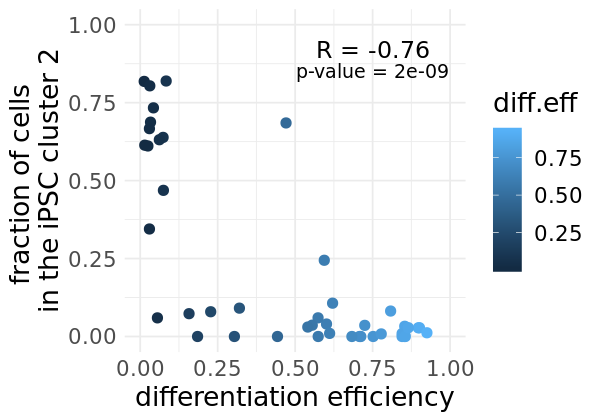

In [35]:
options(repr.plot.width=5, repr.plot.height=3.5)
ggplot(df7, aes(x = diff.eff, y = frac.cluster2, col = diff.eff)) + geom_point(size = 2.5) + 
    xlim(c(0,1)) + ylim(c(0,1)) + 
    annotate("text", x=0.75, y=0.92, 
             label = paste0("R = ",round(cor(df7$diff.eff, df7$frac.cluster2),digit = 2)), size = 5) +
    annotate("text", x=0.75, y=0.85, 
             label = paste0("p-value = ",round(cor.test(df7$diff.eff, df7$frac.cluster2)$p.value,digit = 9)), size = 4) +
    xlab("differentiation efficiency") + 
#     ylab("fraction of cells \nin the UTF1+ cluster") + 
    ylab("fraction of cells \nin the iPSC cluster 2") + 
#     stat_smooth(method = "lm", col = "royalblue") + 
     theme_minimal() + theme(text = element_text(size=16))

In [36]:
file2 = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/ipsc_deconvolution/output_donor_celltype_estimation.tsv"

In [37]:
df6 = read.csv(file2,sep="\t",row.names = 1)
head(df6)

,f_cells,o_cells
1191d5e0-9a2a-4ba4-b322-a591912160ee,0.1622908,0.8377092
1b4ab422-05e5-4891-906e-12e9e9c65745,0.1638584,0.8361416
217cd7ee-bfe8-4d37-b014-e47187901dbe,0.1477820,0.8522180
6a50e9bf-8d92-4bac-98f0-50eee10d91d4,0.1785642,0.8214358
896a9050-1423-490a-a12e-3db6217b49d3,0.1453645,0.8546355
a9cadef1-380e-4c4f-a33c-a828a58680e0,0.1116698,0.8883302


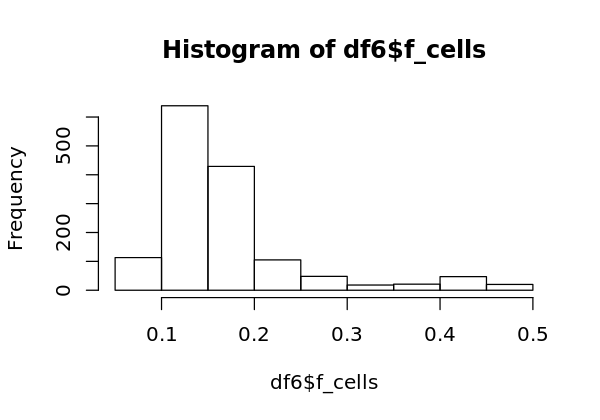

In [38]:
hist(df6$f_cells)

In [39]:
nrow(df0)
head(df0,2)

[1] 197

donor_id,diff.eff,donor_long_id
HPSI0114i-bezi_3,0.58269720,HPSI0114i-bezi_3
HPSI0114i-eipl_1,0.01287835,HPSI0114i-eipl_1


In [40]:
df6$donor_id = rownames(df6)
nrow(df6)
head(df6,2)

[1] 1440

,f_cells,o_cells,donor_id
1191d5e0-9a2a-4ba4-b322-a591912160ee,0.1622908,0.8377092,1191d5e0-9a2a-4ba4-b322-a591912160ee
1b4ab422-05e5-4891-906e-12e9e9c65745,0.1638584,0.8361416,1b4ab422-05e5-4891-906e-12e9e9c65745


In [41]:
df6$donor_id = gsub(".hs37d5","",df6$donor_id)

In [42]:
df8 = inner_join(df0,df6)
head(df8)
nrow(df8)

Joining, by = "donor_id"
Warning message:
“Column `donor_id` joining factor and character vector, coercing into character vector”

donor_id,diff.eff,donor_long_id,f_cells,o_cells
HPSI0114i-bezi_3,0.58269720,HPSI0114i-bezi_3,0.1288848,0.8711152
HPSI0114i-eipl_1,0.01287835,HPSI0114i-eipl_1,0.3991039,0.6008961
HPSI0114i-fikt_3,0.40282686,HPSI0114i-fikt_3,0.1233551,0.8766449
HPSI0114i-kolf_2,0.47059133,HPSI0114i-kolf_2,0.1892075,0.8107925
HPSI0114i-lexy_2,0.72690535,HPSI0114i-lexy_2,0.1227552,0.8772448
HPSI0114i-rozh_4,0.56146789,HPSI0114i-rozh_4,0.1638520,0.8361480


[1] 182

In [43]:
cor.test(df8$diff.eff, df8$f_cells)$p.value

[1] 3.015294e-12

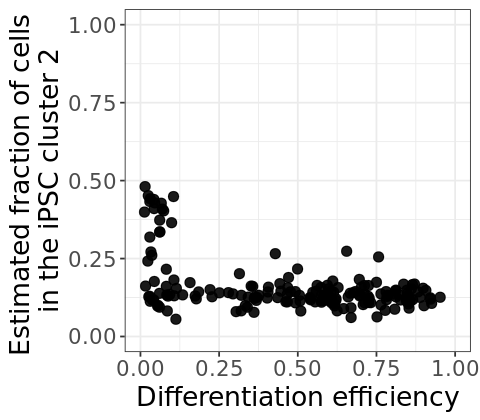

In [49]:
options(repr.plot.width=4, repr.plot.height=3.5)
ggplot(df8, aes(x = diff.eff, y = f_cells)) + geom_point(size = 2.5, alpha = 0.9) + 
    xlim(c(0,1)) + ylim(c(0,1)) + 
   xlab("Differentiation efficiency") + 
#     ylab("fraction of cells \nin the UTF1+ cluster") + 
    ylab("Estimated fraction of cells \nin the iPSC cluster 2") + 
#     stat_smooth(method = "lm", col = "royalblue") + 
     theme_bw() + theme(text = element_text(size=16))

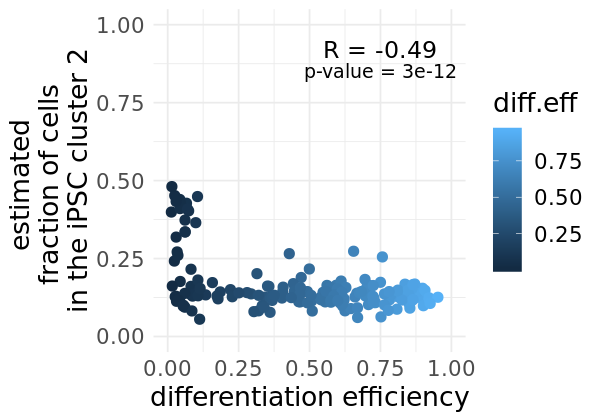

In [45]:
options(repr.plot.width=5, repr.plot.height=3.5)
ggplot(df8, aes(x = diff.eff, y = f_cells, col = diff.eff)) + geom_point(size = 2.5) + 
    xlim(c(0,1)) + ylim(c(0,1)) + 
    annotate("text", x=0.75, y=0.92, 
             label = paste0("R = ",round(cor(df8$diff.eff, df8$f_cells),digit = 2)), size = 5) +
    annotate("text", x=0.75, y=0.85, 
             label = paste0("p-value = ",round(cor.test(df8$diff.eff, df8$f_cells)$p.value,digit = 12)), size = 4) +
    xlab("differentiation efficiency") + 
#     ylab("fraction of cells \nin the UTF1+ cluster") + 
    ylab("estimated \nfraction of cells \nin the iPSC cluster 2") + 
#     stat_smooth(method = "lm", col = "royalblue") + 
     theme_minimal() + theme(text = element_text(size=16))

In [50]:
annos_file = "/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/annos/combined_feature_id_annos.tsv"
annos = read.csv(annos_file,sep="\t")
head(annos)

feature_id,chromosome,start,end,hgnc_symbol,combined_feature_id,ensembl_gene_id
ENSG00000000003_TSPAN6,X,99883667,99894988,TSPAN6,ENSG00000000003_TSPAN6,ENSG00000000003
ENSG00000000419_DPM1,20,49551404,49575092,DPM1,ENSG00000000419_DPM1,ENSG00000000419
ENSG00000000457_SCYL3,1,169818772,169863408,SCYL3,ENSG00000000457_SCYL3,ENSG00000000457
ENSG00000000460_C1orf112,1,169631245,169823221,C1orf112,ENSG00000000460_C1orf112,ENSG00000000460
ENSG00000001036_FUCA2,6,143815948,143832827,FUCA2,ENSG00000001036_FUCA2,ENSG00000001036
ENSG00000001084_GCLC,6,53362139,53481768,GCLC,ENSG00000001084_GCLC,ENSG00000001084


In [54]:
annos[annos$hgnc_symbol == 'NANOG',]
annos[annos$hgnc_symbol == 'SOX2',]
annos[annos$hgnc_symbol == 'POU5F1',]

,feature_id,chromosome,start,end,hgnc_symbol,combined_feature_id,ensembl_gene_id
2848,ENSG00000111704_NANOG,12,7940390,7948655,NANOG,ENSG00000111704_NANOG,ENSG00000111704


,feature_id,chromosome,start,end,hgnc_symbol,combined_feature_id,ensembl_gene_id
9549,ENSG00000181449_SOX2,3,181429714,181432221,SOX2,ENSG00000181449_SOX2,ENSG00000181449


,feature_id,chromosome,start,end,hgnc_symbol,combined_feature_id,ensembl_gene_id
10925,ENSG00000204531_POU5F1,6,31132119,31148508,POU5F1,ENSG00000204531_POU5F1,ENSG00000204531
